# Black friday sales prediction #
In this model we will predict the purchase amount by customers based on  known dataset of purchase amount of previous customers of different age groups and of different product choices.We will use linear regression to implement the model .The dataset has 550,069 rows and 12 columns.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [3]:
data=pd.read_csv('training.csv',delimiter=',')

In [4]:
sum(np.isnan(data['Product_Category_2']))

173638

In [5]:
sum(np.isnan(data['Product_Category_3']))

383247

Now columns Product_Category_2 ,Product_Category_3 have very much missing values so we will remove these columns since these can effect our model .

In [6]:
data.drop(['Product_Category_2', 'Product_Category_3'], axis=1)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [7]:
a=data['User_ID']
b=data['Product_ID'] 


In [8]:
#Removing unwanted features
data=data.drop(['User_ID'],axis=1)
data=data.drop(['Product_ID'],axis=1)

In [9]:
to_enc=['Age','City_Category','Gender',]

Now we will encode our categorical data using  inbuilt LabelEncoder() function

In [10]:
for i in to_enc:
    le=preprocessing.LabelEncoder()
    le.fit(data[i])
    le.transform(data[i])
    data[i]=le.fit_transform(data[i])

In [11]:
data['Stay_In_Current_City_Years'].replace('4+',4,inplace=True)

In [12]:
data1=data.drop(['Product_Category_2', 'Product_Category_3'], axis=1)


In [13]:
data1.replace([np.inf, -np.inf], np.nan)
data1.dropna()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,0,0,10,0,2,0,3,8370
1,0,0,10,0,2,0,1,15200
2,0,0,10,0,2,0,12,1422
3,0,0,10,0,2,0,12,1057
4,1,6,16,2,4,0,8,7969
5,1,2,15,0,3,0,1,15227
6,1,4,7,1,2,1,1,19215
7,1,4,7,1,2,1,1,15854
8,1,4,7,1,2,1,1,15686
9,1,2,20,0,1,1,8,7871


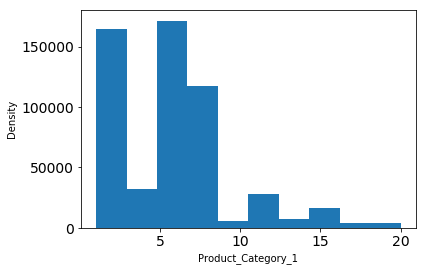

In [14]:
%matplotlib inline
plt.hist(data1['Product_Category_1'])
plt.xlabel('Product_Category_1')
plt.ylabel('Density')
plt.show()

In [15]:
arr=data1.values

In [16]:
X=arr[:,:7]
Y=arr[:,7]


In [17]:
lr=LinearRegression()
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now we will test our model using separate test dataset

In [51]:
test=pd.read_csv('test.csv')

In [52]:
sum(np.isnan(test['Product_Category_2']))


72344

In [53]:
sum(np.isnan(data['Product_Category_3']))

383247

In [54]:
test=test.drop(['User_ID'],axis=1)
test=test.drop(['Product_ID'],axis=1)
for j in to_enc:
    LE=preprocessing.LabelEncoder()
    LE.fit(test[j])
    LE.transform(test[j])
    test[j]=LE.fit_transform(test[j])
test['Stay_In_Current_City_Years'].replace('4+',4,inplace=True)
test1=test.drop(['Product_Category_2', 'Product_Category_3'], axis=1)
test1.replace([np.inf, -np.inf], np.nan)
test1.dropna()
test_arr=test1.values
X1=arr[:,:7]
Y1=arr[:,7]
y_pred=lr.predict(X1)
y_pred


array([ 9307.94880043, 10182.52683746,  5372.34763383, ...,
        2453.73897167,  3215.84276271,  2588.75730234])

In [55]:
y_pred.mean()

9263.96871295913